In [3]:
!pip install palmerpenguins

In [31]:
# Q1

In [4]:
import plotly.graph_objects as go
import pandas as pd
from palmerpenguins import load_penguins

In [5]:
penguins = load_penguins()

In [6]:
penguins = penguins[penguins['flipper_length_mm'].notna()]

In [7]:
figures = []

In [8]:
for species, group in penguins.groupby('species'):
    flipper_lengths = group['flipper_length_mm']

In [25]:
    mean = flipper_lengths.mean()
    median = flipper_lengths.median()
    min_length = flipper_lengths.min()
    max_length = flipper_lengths.max()
    range_ = flipper_lengths.max() - flipper_lengths.min()
    q1 = flipper_lengths.quantile(0.25)
    q3 = flipper_lengths.quantile(0.75)
    iqr = q3 - q1
    std_dev = flipper_lengths.std()

In [17]:
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=flipper_lengths, name=f"{species} Flipper Length", opacity=0.75))

In [18]:
fig.add_vline(mean, line_color='blue', line_width=2, annotation_text='Mean', annotation_position='top right', annotation=dict(font=dict(color="blue")))
fig.add_vline(median, line_color='red', line_width=2, annotation_text='Median', annotation_position='top right', annotation=dict(font=dict(color="red")))

In [20]:
fig.add_vline(mean, line_color='blue', line_width=2, annotation_text='Mean', annotation_position='top right', annotation=dict(font=dict(color="blue")))
fig.add_vline(median, line_color='red', line_width=2, annotation_text='Median', annotation_position='top right', annotation=dict(font=dict(color="red")))

In [21]:
   fig.add_vrect(x0=mean - std_dev, x1=mean + std_dev, fillcolor='yellow', opacity=0.3,
                  annotation_text='±1 Std Dev', annotation_position='top left', line_width=0)

In [22]:
  fig.add_vrect(x0=mean - 2 * std_dev, x1=mean + 2 * std_dev, fillcolor='orange', opacity=0.2,
                  annotation_text='±2 Std Dev', annotation_position='top left', line_width=0)


In [26]:
fig.add_hrect(y0=0, y1=flipper_lengths.value_counts().max(), x0=min_length, x1=max_length,
                  fillcolor='green', opacity=0.2, line_width=0, annotation_text='Range', annotation_position='top left')

In [27]:
    fig.add_hrect(y0=0, y1=flipper_lengths.value_counts().max(), x0=q1, x1=q3,
                  fillcolor='purple', opacity=0.3, line_width=0, annotation_text='IQR', annotation_position='top left')

In [28]:
    fig.update_layout(title=f'Flipper Length Distribution for {species}',
                      xaxis_title='Flipper Length (mm)',
                      yaxis_title='Count',
                      barmode='overlay',
                      legend_title="Statistics")

In [29]:
figures.append(fig)

In [30]:
for fig in figures:
    fig.show()

In [32]:
#Q2

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from palmerpenguins import load_penguins

In [34]:
penguins = load_penguins()

In [35]:
penguins = penguins[penguins['flipper_length_mm'].notna()]

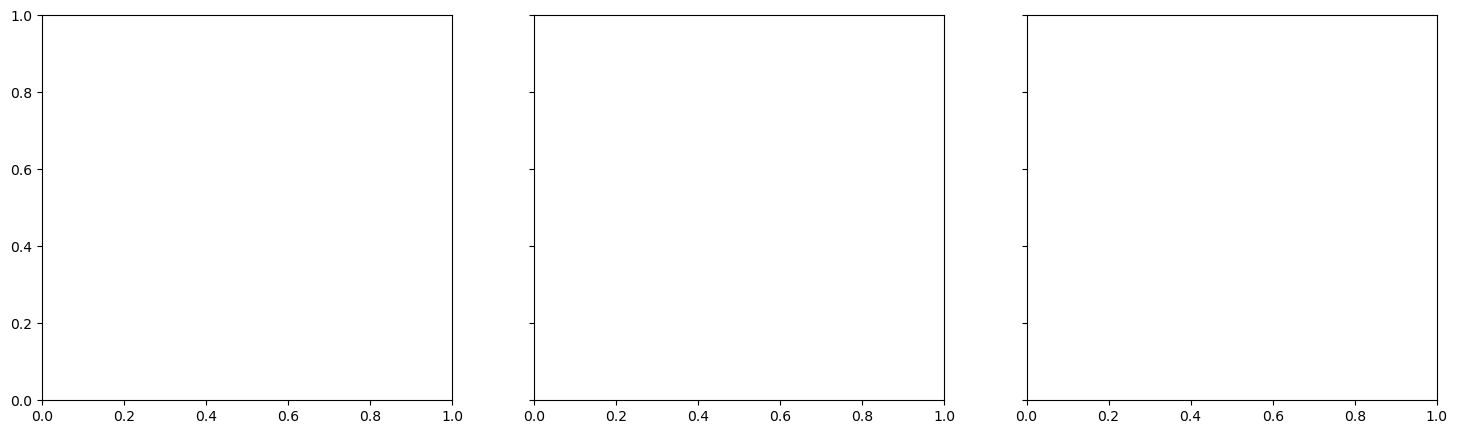

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=True)

In [37]:
mean_color = 'blue'
median_color = 'red'
range_color = 'green'
iqr_color = 'purple'
std_dev_color = 'orange'

In [38]:
for ax, (species, group) in zip(axes, penguins.groupby('species')):
    flipper_lengths = group['flipper_length_mm']

In [39]:
    mean = flipper_lengths.mean()
    median = flipper_lengths.median()
    min_length = flipper_lengths.min()
    max_length = flipper_lengths.max()
    q1 = flipper_lengths.quantile(0.25)
    q3 = flipper_lengths.quantile(0.75)
    iqr = q3 - q1
    std_dev = flipper_lengths.std()

In [40]:
   sns.kdeplot(flipper_lengths, ax=ax, fill=True)

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

In [41]:
    ax.axvline(mean, color=mean_color, linestyle='--', label='Mean')
    ax.axvline(median, color=median_color, linestyle='--', label='Median')

In [42]:
ax.axvspan(mean - std_dev, mean + std_dev, color=std_dev_color, alpha=0.3, label='±1 Std Dev')
    

In [43]:
ax.axvspan(q1, q3, color=iqr_color, alpha=0.3, label='IQR')

In [44]:
ax.axhspan(0, ax.get_ylim()[1], xmin=min_length, xmax=max_length, color=range_color, alpha=0.2, label='Range')

In [45]:
    ax.set_title(f'KDE of Flipper Length for {species}')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')
    ax.legend()

In [46]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Q3

Summary
"Here's a summary of our conversation:

Data Visualization Preferences: You expressed a preference for using histograms as your favorite visualization tool because they are easy to interpret, helping to identify patterns, trends, and the overall shape of the distribution. You find this particularly helpful for those who may not have a strong background in statistics.

Comparing Visualization Methods: We discussed the strengths and weaknesses of different visualization methods:

Histograms: Clear and intuitive for showing data distribution.
Box Plots: Effective for highlighting range and outliers.
Kernel Density Estimators (KDEs): Useful for estimating the probability density function but less intuitive than histograms and box plots.
Statistical Insights: You mentioned that while histograms provide an overall view, box plots are more useful for investigating specific details like range and outliers, while KDEs offer a deeper understanding of distribution but can be more complex to interpret.

Visualization Implementation: We went through the code to create KDE plots using Seaborn and discussed how to annotate those plots to include statistics like mean, median, range, IQR, and standard deviations."
https://chatgpt.com/share/66f4aded-77b8-8013-a9e4-bce9f7603223

In [48]:
# Q4

In [49]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

In [50]:
n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

In [51]:
fig = make_subplots(rows=1, cols=4)

In [52]:
fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

In [53]:
fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

In [54]:
for trace in fig.data:
    trace.xbins = dict(start=0, end=10)

In [55]:
fig.show()

1.Which datasets have similar means and similar variances
A and B
2.Which datasets have similar means but quite different variances
A and C
3.Which datasets have similar variances but quite different means
B and D
4.Which datasets have quite different means and quite different variances
C and D

In [56]:
# Q5

In [57]:
from scipy import stats
import pandas as pd
import numpy as np

In [58]:
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")

NameError: name 'px' is not defined

In [59]:
sample1.mean()
np.quantile(sample1, [0.5]) # median

array([3.4798424])

In [60]:
sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

In my perspective, the "mean" and "median" are important compositions of a data set, while "left skewness", and "right skewness" are important evaluations of a data distribution. Distribution with right skewness usually has a relatively lager value of mean than median as the higher outliers pull the mean up. For left skewness ones, the mean is less than median. The mean provides the overall average while the median helps in interpreting data distributions, and offers a better central tendency measure in skewed distributions, making the data conclusion more accurate.

https://chatgpt.com/share/66f4bafe-4be8-8013-943e-6324d112b58d

In [61]:
# Q6

In [62]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

In [63]:
print(df.columns.tolist())

['restaurant id', 'category id', 'item id', 'serving size (oz)', 'calories', 'calories from fat', 'total fat (g)', 'total fat (% daily value)', 'saturated fat (g)', 'saturated fat (% daily value)', 'trans fat (g)', 'cholesterol (mg)', 'cholesterol (% daily value)', 'sodium (mg)', 'sodium (% daily value)', 'carbohydrates (g)', 'carbohydrates (% daily value)', 'dietary fiber (g)', 'dietary fiber (% daily value)', 'sugars (g)', 'protein (g)', 'vitamin a (% daily value)', 'vitamin c (% daily value)', 'calcium (% daily value)', 'iron (% daily value)']


In [64]:
df['total fat (g)'] = pd.to_numeric(df['total fat (g)'], errors='coerce')

In [65]:
means = df.mean(numeric_only=True)
medians = df.median(numeric_only=True)
std_devs = df.std(numeric_only=True)

In [66]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Frequency')

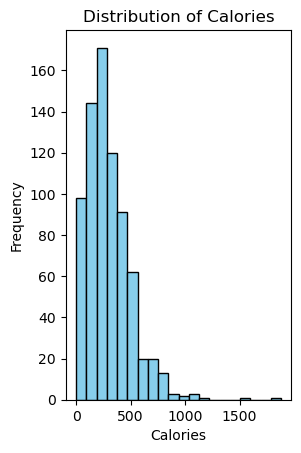

In [67]:
plt.subplot(1, 2, 1)
plt.hist(df['calories'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')

Text(0.5, 0, 'Total Fat (g)')

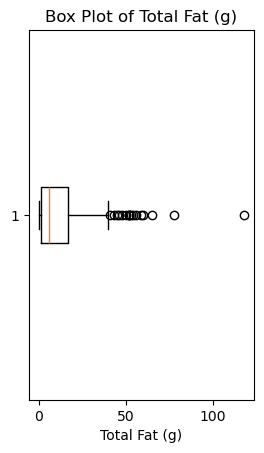

In [68]:
plt.subplot(1, 2, 2)
plt.boxplot(df['total fat (g)'].dropna(), vert=False)
plt.title('Box Plot of Total Fat (g)')
plt.xlabel('Total Fat (g)')

In [73]:
# Q7

In [74]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [75]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="percent change", y="rank", animation_frame="year", animation_group="name",
           size="percent", color="sex", hover_name="name",
           size_max=50, range_x=[-0.005,0.005])

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap', 'iso_alpha', 'iso_num'] but received: percent change